# Titanic: Machine Learning from Disaster
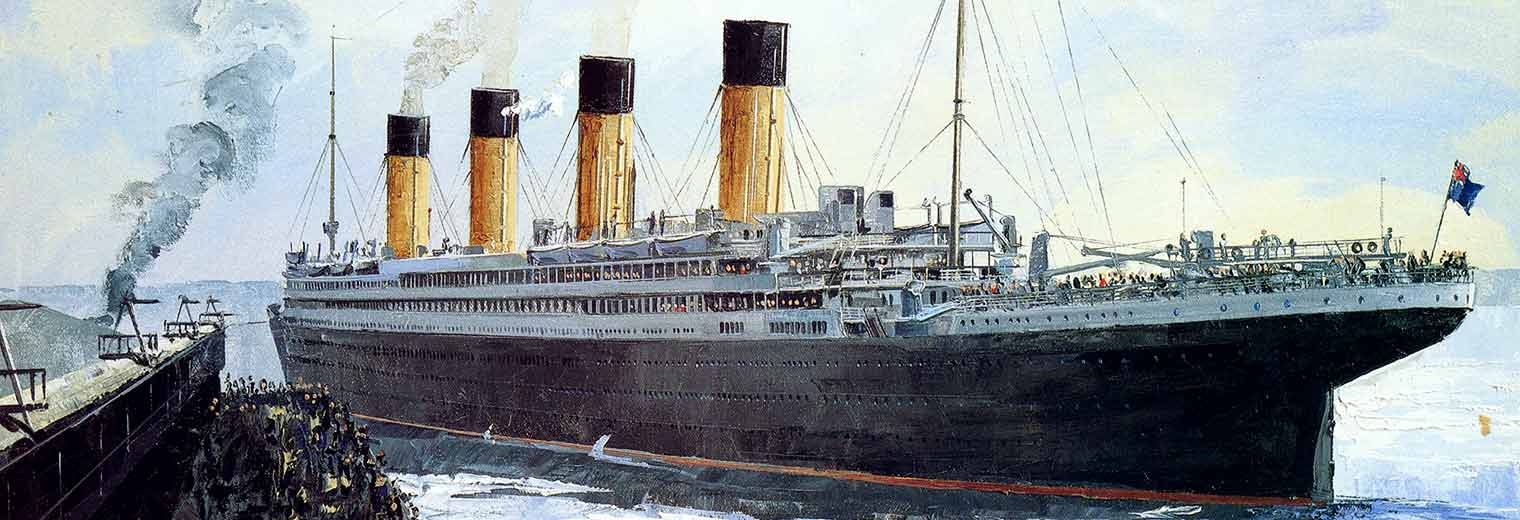

_RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history._
<a href='https://en.wikipedia.org/wiki/RMS_Titanic'>Wikipedia</a>

#### What's in this notebook?

In this notebook, we will explore passenger data from the famous (albeit tragic) first and only voyage of the Titanic. Then we will create a model to predict whether a passenger would survive the sinking of the ship, based on relevant information.

Let's get started.

# 1. Import Libraries and Dataset

## Import Modules

In [1]:
# Algebra
import numpy as np

# Data processing
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Model building
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split

# Evaluation
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,
                             precision_recall_curve, roc_curve, roc_auc_score, matthews_corrcoef)

# Warnings
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [8]:
# Datasets
train_data = pd.read_csv('Kaggle/Titanic/train.csv')
test_data = pd.read_csv('Kaggle/Titanic/test.csv')

# 2. Exploratory Data Analysis

## First view on the data

#### What's in the dataset?

To start, we need to get a first impression of what's inside our train and test sets and how they are structured.

In [9]:
print('Shape of train data: {}'.format(train_data.shape))
train_data.head()

Shape of train data: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
print('Shape of test data: {}'.format(test_data.shape))
test_data.head()

Shape of test data: (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### What do the variables mean? 
* **PassengerId** - Passenger's unique id in the dataset
* **Survived** - Survival status
* **Pclass** - Ticket class
* **Name** - Passenger's name
* **Sex** - Sex (male/female)	
* **Age** - Age in years	
* **SibSp** - # of siblings / spouses onboard	
* **Parch** - # of parents / children onboard	
* **Ticket** - Ticket number	
* **Fare** - Ticket fare	
* **Cabin** - Cabin number	
* **Embarked** - Port of embarkation	(C=Cherbourg, Q=Queenstown, S=Southampton)

#### Notes:
* Train set has 891 rows (passengers) and 12 columns (features). The **Survived** column will be our target variable.
* Test set has 418 rows and 11 columns. No **Survived** column in this set (this is what we need to predict).
* Already we can spot missing values in the **Cabin** column.

Finally let's get a high level overview of our data to get a sense of value ranges and detect if any missing values or outliers are present.

In [11]:
# Describe data
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"McCoy, Miss. Agnes",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Notes:
* Over 75% of values are missing from the **Cabin** column.
* About 20% of values are missing from the **Age** column.
* There is 1 entry missing from **Fare** and 2 from **Embarked** columns.
* There are duplicate entries in **Name**, **Ticket** and **Cabin** columns.
* Max values for **SibSp**, **Parch** and **Fare** columns appear to be rather large compared to their distributions.

## Visual exploration

Now that we have a general overview of our data, let's dig in deeper by exploring the features with visualizations to get a better grasp on it.

### Feature: Survived

Overall Survivability(%): 38.38


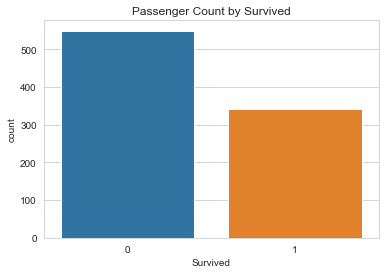

In [12]:
print('Overall Survivability(%): {}'.format(round(100*train_data.Survived.mean(),2)))

# Plot count by survival
ax = sns.countplot(x='Survived', data=train_data).set_title('Passenger Count by Survived')

#### Notes:
* Less than 40% of the passengers survived.

Data exploration is performed on the train set, so survival percentages will differ from the ones obtained by the full population of Titanic passengers. The actual survival rate was about 32% instead of 38%.

### Feature: Sex

Survivability(%) by Sex
female    74.20
male      18.89
Name: Survived, dtype: float64


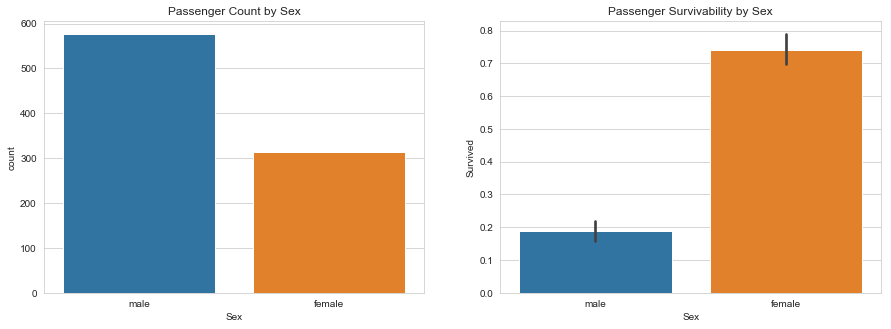

In [13]:
print('Survivability(%) by {}'.format(round(100*train_data.groupby('Sex').mean().Survived,2)))

# Plot count and survivability of passengers by sex
fig, axes = plt.subplots(1, 2, figsize=(15,5))
ax = sns.countplot(x='Sex', data=train_data, ax=axes[0]).set_title('Passenger Count by Sex')
ax = sns.barplot(x='Sex', y='Survived', data=train_data,  ax=axes[1]).set_title('Passenger Survivability by Sex')

#### Notes:
* There were almost twice as many men than women onboard.
* Women were 4 times as likely to survive.

Therefore it seems that the sex of a passenger is a strong indicator of survival.

### Feature: Pclass

Survivability(%) by Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64


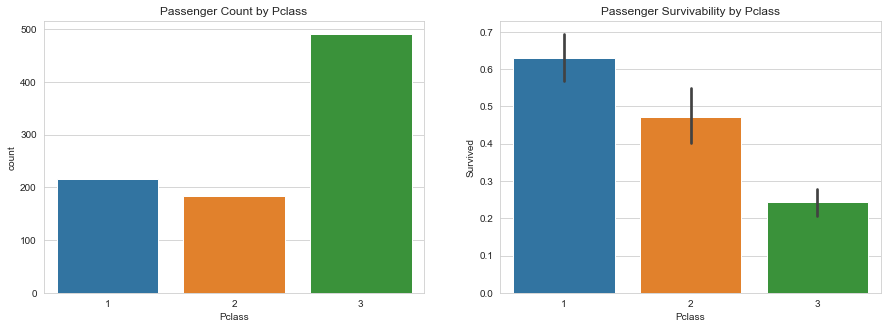

In [14]:
print('Survivability(%) by {}'.format(round(100*train_data.groupby('Pclass').mean().Survived,2)))

# Plot count and survivability of passengers by class
fig, axes = plt.subplots(1, 2, figsize=(15,5))
ax = sns.countplot(x='Pclass', data=train_data, ax=axes[0]).set_title('Passenger Count by Pclass')
ax = sns.barplot(x='Pclass', y='Survived', data=train_data, ax=axes[1]).set_title('Passenger Survivability by Pclass')

#### Notes:
* More than half of the total passengers were of 3rd class.
* Higher classes meant better chances of survival. 2nd class was 2 times as likely to survive compared to 3rd, and 1st even more so.

Not surprisingly, passengers with higher social standing got priority on the lifeboats and therefore had a better chance of survival.

### Feature: Embarked

Survivability(%) by Embarked
C    55.36
Q    38.96
S    33.70
Name: Survived, dtype: float64


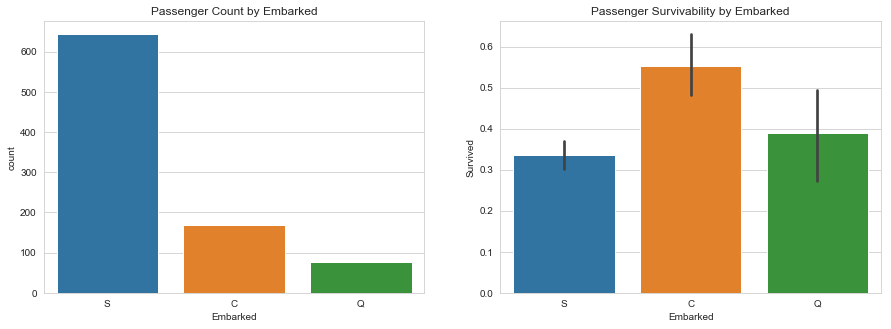

In [15]:
print('Survivability(%) by {}'.format(round(100*train_data.groupby('Embarked').mean().Survived,2)))

# Plot count and survivability of passengers by port of embarkation
fig, axes = plt.subplots(1, 2, figsize=(15,5))
ax = sns.countplot(x='Embarked', data=train_data, ax=axes[0]).set_title('Passenger Count by Embarked')
ax = sns.barplot(x='Embarked', y='Survived', data=train_data, ax=axes[1]).set_title('Passenger Survivability by Embarked')

#### Notes:
* The vast majority of passengers boarded on Southampton.
* Passengers embarking on Cherbourg seem to have better chances of survival.

Port of embarkation shouldn't play a role in a passenger's survival. Let's dig a bit deeper and see if this piece of information can be explained by another factor.

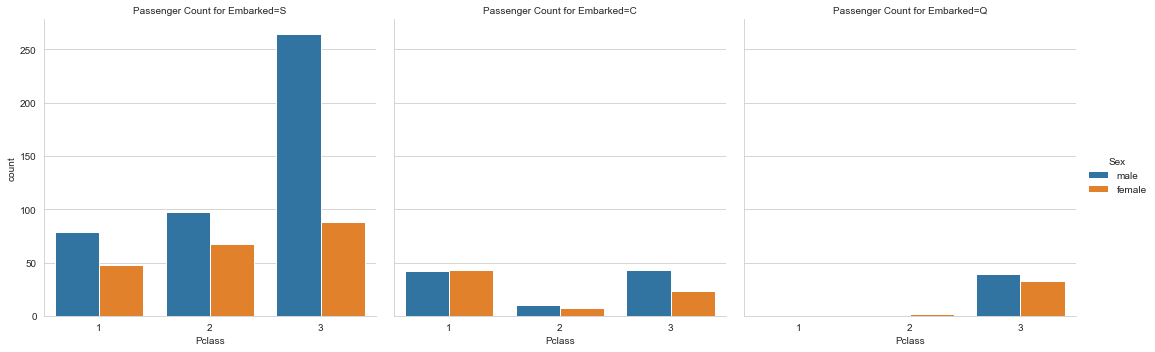

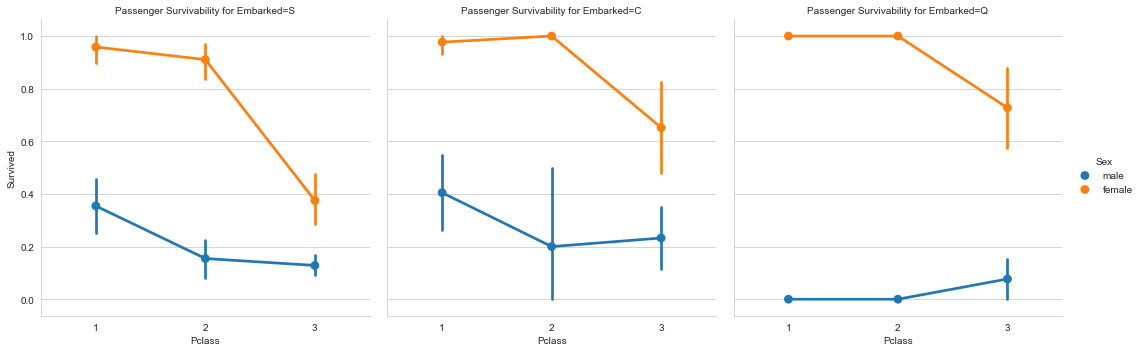

In [17]:
# Plot count and survivability of passengers by class, sex and port of embarkation
ax = sns.catplot(x='Pclass', hue='Sex', col='Embarked', kind='count', data=train_data) \
    .set_titles("Passenger Count for {col_var}={col_name}")
ax = sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', kind='point', data=train_data) \
    .set_titles("Passenger Survivability for {col_var}={col_name}")

#### Notes:
* The ratio of 1st class passengers is much higher in Cherbourg, thus explaining the higher survival rate of passengers boarding from that port.
* Passengers from Queenstown were almost entirely of 3rd class.
* While males of 1st class had clearly better chances of survival than the rest, it seems it didn't make much difference being on 2nd or 3rd class.
* Interestingly enough, females of 1st and 2nd class had roughly the same chance of survival, which was almost 100%. Women of 3rd class had lower chances, but still significantly higher than males.

### Feature: Age

In [ ]:
# Plot total passenger and survivors count by age
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(train_data.Age.dropna(), bins=32, kde=False, label='Total') \
    .set_title('Total Passengers and Survivors Count by Age')
ax = sns.distplot(train_data.Age.dropna()[train_data['Survived']==1], bins=32, kde=False, label='Survived').legend()

# Plot likelihood of surviving/not surviving by age
ax = sns.FacetGrid(train_data, hue="Survived", aspect=4).set(xlim=(0, 80)).map(sns.kdeplot,'Age', shade=True).add_legend() \
    .fig.suptitle('Survivability by Age')

#### Notes:
* Most of the passengers were aged between 16 and 40.
* Children (age under 10) had better chances of survival.
* Young adults (age 15 to 30) and seniors (age over 60) were less likely to survive.

Next we will group passengers in 5 age bands with each one having a range of roughly 15 years, then we'll drill down further for insights.

In [ ]:
# Group ages in 5 age bands
train_data['Ageband'] = pd.cut(train_data.Age.dropna(), 5, labels=[0,1,2,3,4])
print('Survival(%) by {}'.format(round(100*train_data.groupby('Ageband').Survived.mean(),2)))

# Plot count and survivability of passengers by ageband, sex and class
ax = sns.catplot(x='Ageband', hue='Sex', col='Pclass', kind='count', data=train_data) \
    .set_titles("Passenger Count for {col_var}={col_name}")
ax = sns.catplot(x='Ageband', y='Survived', hue='Sex', col='Pclass', kind='point', data=train_data) \
    .set_titles("Passenger Survivability for {col_var}={col_name}")

#### Notes:
* The most common age band was young adults (15-30). Most of them were males of 3rd class.
* There were very few elderly, and almost no females among them.
* In both sexes, children were given priority.
* For 1st and 2nd class females, age did not make much of a difference. In 3rd class survivability dropped for older ages.
* For males we see a steady drop in survivability with age.

### Feature: Fare

In [ ]:
# Plot total passenger and survivors count by age
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(train_data.Fare, bins=50, kde=False).set_title('Total Passengers and Survivors Count by Fare')
ax = sns.distplot(train_data.Fare[train_data['Survived']==1], bins=50, kde=False)

# Plot likelihood of surviving/not surviving by age
ax = sns.FacetGrid(train_data, hue="Survived", aspect=4).set(xlim=(0, 500)).set(ylim=(0, 0.1)) \
    .map(sns.kdeplot,'Fare', shade=True).add_legend().fig.suptitle('Survivability by Age')

#### Notes:
* The distribution is highly skewed to the right. The vast majority of passengers had a fare of less that 30 dollars.
* The passengers with the lowest of fares had the least chances of surviving.

Let's see if fares are correlated with class.

In [ ]:
# Plot distribution of fares by class
ax = sns.FacetGrid(train_data, hue='Pclass', aspect=4).set(xlim=(0,100)).map(sns.kdeplot, 'Fare', shade=True).add_legend() \
    .fig.suptitle('Passenger Fare by Pclass')

As expected, the lowest fares  belonged to 3rd class passengers and as we saw earlier, higher class meant higher chances of survival.

### Feature: Cabin

At first glance the cabin number doesn't seem to carry much predictive value. However, we can check if _having_ a cabin affects survival in any way.

In [ ]:
# Plot count and survivability of passengers by possession or not of a cabin
fig, axes = plt.subplots(1, 2, figsize=(15,5))
ax = sns.countplot(x=train_data.Cabin.notnull().astype(int), ax=axes[0]).set_title('Passenger Count by Cabin Ownership')
ax = sns.barplot(x=train_data.Cabin.notnull().astype(int), y=train_data.Survived, ax=axes[1]) \
    .set_title('Passenger Survivability by Cabin Ownership')

Indeed, looks like having a cabin gave more than double the chance of survival.

### Feature: Parch and SibSp

In [ ]:
# Plot count and survivability of passengers by class, sex and port of embarkation
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
ax = sns.countplot(x='SibSp', data=train_data, ax=axes[0][0]).set_title('Passenger Count by number of Siblings/Spouses')
ax = sns.countplot(x='Parch', data=train_data, ax=axes[0][1]).set_title('Passenger Count by number of Parents/Children')
ax = sns.pointplot(x='SibSp', y='Survived', data=train_data, ax=axes[1][0]) \
    .set_title('Passenger Survivability by number of Siblings/Spouses')
ax = sns.pointplot(x='Parch', y='Survived', data=train_data, ax=axes[1][1]) \
    .set_title('Passenger Survivability by number of Parents/Children')

#### Notes:
* Most passengers had no siblings/spouses onboard, a fair amount had only one and very few more than one.
* The vast majority had no parents/children onboard, a few had one or two and almost none more than two.
* People with few family members seem to have better chances of survival.

In light of this, let's combine these 2 features and see how they affect survivability.

In [ ]:
# Combine SibSp and Parch into one feature
train_data['Relatives'] = train_data.SibSp+train_data.Parch

# Plot count and survivability of passengers by possession or not of a cabin
fig, axes = plt.subplots(1, 2, figsize=(15,5))
ax = sns.countplot(x='Relatives', data=train_data, ax=axes[0]).set_title('Passenger Count by number of Relatives')
ax = sns.pointplot(x='Relatives', y='Survived', data=train_data, ax=axes[1]) \
    .set_title('Passenger Survivability by number of Relatives')

Indeed there seems to be a noticeable increase in survivability in people with one to three relatives onboard.

## Summary

* About 1 every 3 passengers survived.
* Females had 4 times better chances of survival compared to males.
* Higher classes had also higher chance of survival.
* Children were given priority on the lifeboats.
* Owning a cabin doubled the chances of survival.
* Passengers with small families onboard were more likely to survive.

# 3. Data Cleaning

Now that we have a good insight on our data, we can start preprocessing it to be used in machine learning algorithms.

## Combine datasets

We will first combine the train and test datasets into a single dataset.

In [ ]:
# Combine train and test sets into a single dataset for data processing
data = pd.concat([train_data, test_data], join='inner', ignore_index=True)

## Clean and prepare data

Next we will run through the features one-by-one once more and perform data cleaning on them.

### Feature: PassengerId and Ticket

**PassengerId** and **Ticket** columns offer no useful information, therefore we can safely discard them from our dataset.

### Feature: Pclass

**Pclass** is an ordinal variable so it can be used as it is currently.

### Feature: Embarked

**Embarked** has 2 missing values, so let's have a look at those.

In [ ]:
# Show passengers with missing Embarked values
data[data.Embarked.isnull()]

We see that both missing values are of 1st class. As we saw earlier, the majority of 1st class passengers (and passengers overall) embarked from Southampton, so we will fill missing values with the most common value, S.

In [ ]:
# Fill missing values in Embarked with 'S'
data.Embarked.fillna('S', inplace=True)

### Feature: Age

Next, to deal with missing values in **Age**, we will group the ages of passengers by sex and class, and find the median of each subgroup. Then we will fill null values in our dataset with the corresponding value for each subgroup.

In [ ]:
# For each different Sex and Pclass combination subgroup, fill NaN values with its median
for sex in set(data.Sex):
    for pclass in set(data.Pclass):
        age = data[(data.Sex==sex) & (data.Pclass==pclass)].Age.median()
        data.loc[(data.Age.isnull()) & (data.Sex==sex) & (data.Pclass==pclass), 'Age'] = age

# Median values of each subgroup for reference
data.groupby(['Pclass','Sex']).Age.median().unstack()

Now that there are no missing values, we'll turn it from a continuous to an ordinal variable **Ageband**, by grouping ages into 5 bands of equal ranges with cut.

In [ ]:
# Group ages in 5 age bands
data['Ageband'] = pd.cut(data.Age, 5, labels=[0,1,2,3,4])

We can now safely discard **Age** variable.

### Feature: Fare

There is but a single passenger with a missing value of **Fare**.

In [ ]:
# Show passenger with missing Fare value
data[data.Fare.isnull()]

The only missing value is from a passenger of 3rd class that embarked on Southampton, so we will fill that value with the median of passengers with the same **Pclass** and **Embarked**.

In [ ]:
# Fill missing value with median of 3rd class passengers boarding from Southampton
data.loc[1043,'Fare'] = data[(data.Pclass==3) & (data.Embarked=='S')].Fare.median()

Same as **Age**, we need to turn **Fare** to an ordinal variable. Because data is highly skewed this time, we will use qcut instead of cut. This segments the distribution into bands with an equal number of observations, instead of bands of equal ranges.

In [ ]:
# Group fares in 5 fare bands
data['Fareband'] = pd.qcut(data.Fare, 5, labels=False)

We can now safely discard **Fare** variable.

### Feature: Cabin

As we saw earlier, having a cabin resulted in having twice as many chances of survival. In light of that let's change **Cabin** from containing cabin numbers, to containing information about whether the passenger owned a cabin or not.

In [ ]:
# Change Cabin feature to have a value of 1 if the passenger owned a cabin and 0 otherwise
data['Cabin'] = data.Cabin.notnull().astype(int)

### Feature: SibSp and Parch

It seems that passengers that one to three relatives onboard had better chances of surviving. Therefore we will create a new feature called **Small_Family** to include that piece of information about our passengers.

In [ ]:
# Create new feature that shows if the passenger has a small family onboard
data['Small_Family'] = pd.Series(data.SibSp+data.Parch).apply(lambda x: 1 if x>0 and x<4 else 0)

We can now safely discard **SibSp** and **Parch** variables.

### Feature: Name

Examining the format of entries in the **Name** column, we notice that each passenger has a title assigned to them. We can extract that information to create a new field called **Title** and see if it plays a role in chances of survival.

In [ ]:
# Extract Title from Name and count the sum of occurences for each distinct value
data['Title'] = data.Name.apply(lambda x: x.split(',')[1].strip().split('.')[0].strip())
data.Title.value_counts()

We notice there are some occurences of french honorifics for women, and a lot of different values with very few occurences each. We'll convert the french honorifics to their english equivalents, and bag the uncommon ones in an "Other" category.

In [ ]:
# Replace rare occurences in Title with 'Other'
data.Title = data.Title.replace(['Dr', 'Rev', 'Col', 'Major', 'Sir', 'Capt', 'Lady', 'Jonkheer', \
                                   'Dona', 'Don', 'the Countess'], 'Other', regex=True)

# Replace french honorifics with their english equivalents
data.Title = data.Title.replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, regex=True)

We can now safely discard **Name** variable.

### Feature: Sex

For **Sex**, all we need to do is binarize its 2 distinct values into 0 and 1.

In [ ]:
# Change 'female'/'male' into 0/1
data.Sex = data.Sex.map({'female':0, 'male':1}).astype(int)

## Binarize categorical features

In order for our algorithms to work properly, non-numeric categorical features must be transformed into binarized dummy variables. We will also drop one column from each set of dummy variables, because its information can be explained by the rest of of the set, therefore it is redundant.

In [ ]:
# Create dummy variables for categorical features
data = pd.get_dummies(data, columns=['Embarked', 'Title'], drop_first=True)

## Discard unused features

Features that offer no predictive value will be dropped from the dataset.

In [ ]:
# Discard unnecessary features
data.drop(['PassengerId', 'Ticket', 'Name', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1, inplace=True)

## Split data into train/test sets

Now that our data is clean, we can split our data back into a train set **X**, test set **test** and an array of our target variable **y**.

In [ ]:
# Split data back into train set, test set and target variable
X = data[:891]
test = data[891:].reset_index(drop=True)
y = train_data.Survived

Before going to build our model, let's take another look at our dataset and see how it has changed.

In [ ]:
X.head()

## Correlation heatmap

Finally, let's plot a heatmap to see how correlated our features are.

In [ ]:
corr = data.corr()

# Plot correlation heatmap
fig, size = plt.subplots(figsize=(15,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, cmap=sns.diverging_palette(250, 10, as_cmap=True), annot=True, mask=mask, square=True, \
                 xticklabels=data.corr().columns, yticklabels=data.corr().columns).set_title('Correlation of Features')

#### Notes:
* As we saw during EDA, **Pclass** is correlated with **Fareband**, but also with **Cabin**.
* As expected, there is strong correlation between sex and titles that imply a certain sex, especially **Sex** and **Title_Mr**.

# 4. Model Building

Our data is ready and we can proceed to building our predictive model.

## Split train/test sets

In order to avoid overfitting, we need to split our dataset into a train set that we will use to train our model, and a test set to evaluate its performance on never-before-seen data.

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

## Create basic models

Next we'll train a set of models using different algorithms and see which ones show the most promise.

In [ ]:
# List of algorithms to be used
models = [('Logistic Regression', LogisticRegression()),
          ('Perceptron', Perceptron()),
          ('Naive Bayes', GaussianNB()),
          ('Random Forest', RandomForestClassifier(random_state=7)),
          ('K Nearest Neighbors', KNeighborsClassifier()),
          ('Linear Support Vector', LinearSVC()),
          ('Support Vector', SVC()),
          ('Gradient Boosting', GradientBoostingClassifier())]

# Train each model and evaluate its accuracy
scores = []
for name, model in models:
    model.fit(X_train,y_train)
    score = round(100*model.score(X_test,y_test), 2)
    scores.append((name, score))
scores.sort(reverse=True, key=lambda x:x[1])
    
# Show performances of all models
model_scores = pd.DataFrame([x[1] for x in scores], index=[x[0] for x in scores], columns=['Accuracy(%)'])
model_scores

Seems like the top 3 performing algorithms are **Gradient Boosting**, **Random Forest**, and **KNN**. For the purposes of this notebook we'll pick **Random Forest** and try to improve its performance.

## Hyperparameter tuning

To find the best parameters for our model, we will use grid search. This is a computationally heavy process that results in long training time, therefore it will not be included in this notebook.

### Grid search

After using GridSearch on **Random Forest**, the model that performed best had a score of **83.51%** with parameters:
* **criterion**: entropy
* **max_depth**: 5
* **min_samples_leaf**: 2
* **n_estimators**: 50

## Evaluate model

To evaluate the performance of our model, let's first retrain it with the optimal hyperparameters found during grid search.

In [ ]:
# Train model with optimal hyperparameters
random_forest = RandomForestClassifier(max_depth=5, criterion='entropy', min_samples_leaf=2, n_estimators=50, random_state=7)

# Calculate cross validated accuracy
model_score = format(100*np.mean(cross_val_score(random_forest, X, y, cv=10)), '0.2f')
print('Random Forest Accuracy: {}'.format(model_score))

### Feature importances

Next we'll have a look at how much predictive value each variable has.

In [ ]:
# Fit model to all training data
random_forest.fit(X,y)

# Create features importance dataframe
features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = random_forest.feature_importances_
features.sort_values(by=['importance'], ascending=False, inplace=True)

# Plot feature importances
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x='importance', y='feature', color='lightblue', data=features).set_title('Feature Importances')

#### Notes:
* **Title_Mr** was the most important feature in the model. Understandably, **Sex** had high importance as well because those 2 are highly correlated.
* **Pclass** also had a high level of importance.
* The least important features were **Emarked_Q** and **Title_Other**.

### Confusion matrix

With 83.51% accuracy, it means we get 83 out of 100 predictions correct. However to get an insight of how many passengers we incorrectly classify as survivors (Type I error) or non survivors (Type II error) we need to calculate the confusion matrix.

In [ ]:
# Predict survivors
predictions = cross_val_predict(random_forest, X, y, cv=10)

# Create confusion matrix
matrix = pd.DataFrame(confusion_matrix(y, predictions), index=['Actual Negatives', 'Actual Positives'], \
                      columns=['Predicted Negatives', 'Predicted Positives'])
matrix

#### Notes:
* **True Negatives**: 503 non surviving passengers classified as non survivors.
* **False Positives**: 46 non surviving passengers classified as survivors.
* **False Negatives**: 101 surviving passengers classified as non survivors.
* **True Positives**: 241 surviving passengers classified as survivors.

### Precision, Recall, F1-Score

The elements of the confusion matrix can be combined into several metrics that can help us evaluate the model. Some common such metrics are Precision, Recall and the F1-Score.

In [ ]:
# Calculate precision, recall, f1-score
print('Precision: {}'.format(round(precision_score(y, predictions), 4)))
print('Recall: {}'.format(round(recall_score(y, predictions), 4)))
print('F1-Score: {}'.format(round(f1_score(y, predictions), 4)))

* **Precision** - 83.97% of surviving passengers were classified as survivors.
* **Recall** - 70.47% of those classified as survivors were surviving passengers.
* **F1-Score** - 76.63% harmonic mean of Precision and Recall.

### Matthews Correlation Coefficient

While the F1-Score is a very useful metric, it does not take into account True Negatives. This may result in misleading insights about some models, particularly when classes are imbalanced. In this case we can use a different metric, Matthews Correlation Coefficient.

In [ ]:
# Calculate mathews correlation coefficient
print('Matthews Correlation Coefficient: {}'.format(round(matthews_corrcoef(y, predictions), 4)))

This tells us that there is a strong correlation between predicted values and actual values of survival.

### ROC curve

Plotting the ROC curve shows us the relationship between True Positive Rate and False Positive Rate across different thresholds, compared to random chance.

In [ ]:
# Calculate probabilities of survival predictions
y_scores = random_forest.predict_proba(X)[:,1]

# Calculate true positive rates, false positive rates, thresholds
fpr, tpr, thresholds = roc_curve(y, y_scores)

# Plot ROC curve
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.lineplot(x=fpr, y=tpr).set_title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
ax = sns.lineplot([0,1],[0,1])

### AUC score

AUC score calculates the area under the ROC curve. An AUC score of 1 signifies a perfect classfier.

In [ ]:
auc_score = roc_auc_score(y, y_scores)
print("AUC-Score: {}".format(round(auc_score,4)))

### Youden's J

There is a tradeoff between Precision and Recall scores, depending on the threshold used to classify predictions. We can find the optimal cutoff point by calculating the maximum Youden's index and using the threshold corresponding to its value.

In [ ]:
# Calculate optimal threshold
youden_j = np.argmax(tpr-fpr)
threshold = thresholds[youden_j]
print('Optimal threshold: {}'.format(round(threshold,4)))

We can now re-calculate evaluation metrics with the updated threshold.

In [ ]:
# Calculate new predictions
predictions = [1 if x>threshold else 0 for x in y_scores]

# Re-calculate metrics
print('Precision: {}'.format(round(precision_score(y, predictions), 4)))
print('Recall: {}'.format(round(recall_score(y, predictions), 4)))
print('F1-Score: {}'.format(round(f1_score(y, predictions), 4)))
print('Matthews Correlation Coefficient: {}'.format(round(matthews_corrcoef(y, predictions), 4)))

* **Precision** decreased from 83.97% to 74.35%.
* **Recall** improved from 70.47% to 83.92%.
* **F1-Score** improved from 76.63% to 78.85%.
* **Matthews Correlation Coefficient** slightly improved from 64.62% to 64.66%.

# 5. Submit Results

Finally we are ready to create our submission file.

In [ ]:
# Predict survivors
y_submit = random_forest.predict_proba(test)[:,1]
y_submit = [1 if x>threshold else 0 for x in y_submit]

# Create submission dataframe and save to csv
submission = pd.DataFrame([test_data.PassengerId, pd.Series(y_submit, name='Survived')]).T
submission.to_csv('submission.csv', index=False)